<a href="https://colab.research.google.com/github/chaobai/Cousera-DeepLearning.AI-TensorFlow-Developer/blob/master/C3%20-%20Natural%20Language%20Processing/W3/Lab_3_multiple_layer_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete9NKYLZ/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete9NKYLZ/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete9NKYLZ/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 64)          18816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                18816     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 565,697
Trainable params: 565,697
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 111s 262ms/step - loss: 0.6077 - accuracy: 0.6400 - val_loss: 0.3852 - val_accuracy: 0.8288
Epoch 2/10
391/391 [==============================] - 103s 261ms/step - loss: 0.3104 - accuracy: 0.8701 - val_loss: 0.3377 - val_accuracy: 0.8562
Epoch 3/10
391/391 [==============================] - 103s 262ms/step - loss: 0.2134 - accuracy: 0.9170 - val_loss: 0.3352 - val_accuracy: 0.8609
Epoch 4/10
391/391 [==============================] - 103s 261ms/step - loss: 0.1621 - accuracy: 0.9397 - val_loss: 0.3864 - val_accuracy: 0.8464
Epoch 5/10
391/391 [==============================] - 102s 260ms/step - loss: 0.1168 - accuracy: 0.9598 - val_loss: 0.4109 - val_accuracy: 0.8612
Epoch 6/10
391/391 [==============================] - 102s 260ms/step - loss: 0.0784 - accuracy: 0.9751 - val_loss: 0.4582 - val_accuracy: 0.8621
Epoch 7/10
391/391 [==============================] - 102s 260ms/step - loss: 0.0629 - accuracy: 0.9799 - val_loss: 0.5711 -

In [9]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

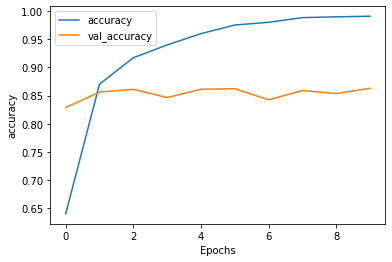

In [10]:
plot_graphs(history, 'accuracy')

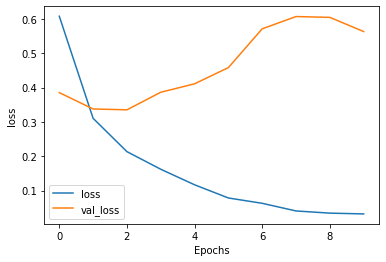

In [11]:
plot_graphs(history, 'loss')